<a href="https://colab.research.google.com/github/Uthmanic/stage-f-17-mental-health/blob/master/Exploratory_Data_Analysis/EDA_Mental_health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
!pip install chart_studio
import chart_studio.plotly as py

from plotly.subplots import make_subplots
%matplotlib inline

     |████████████████████████████████| 71kB 3.6MB/s 


In [3]:
df = pd.read_csv('/content/gdrive/My Drive/survey.csv - Sheet1.csv')

In [4]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [5]:
df.shape

(1259, 27)

In [6]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [7]:
# drop the comments column(87% missing values) and state(40% missing-use country instead)
df.drop(columns=['state','comments','Timestamp'],inplace=True)

In [8]:
print(df['self_employed'].value_counts())
print(df['work_interfere'].value_counts())

No     1095
Yes     146
Name: self_employed, dtype: int64
Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64


In [9]:
# impute missing values by mode
df['self_employed'].fillna('No',inplace=True)
df['work_interfere'].fillna('Sometimes',inplace=True)

In [10]:
df.isnull().sum()

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



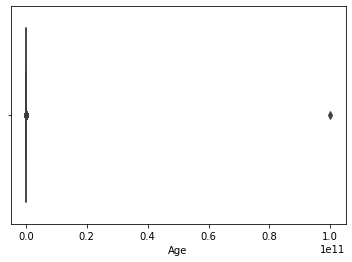

In [11]:
#age column Boxplot
sns.boxplot(df['Age'])

From the plot above, 'Age' column has outliers

In [12]:
#removing outliers
df.drop(df[df['Age'] < 0 ].index, inplace = True) 
df.drop(df[df['Age'] > 100].index, inplace = True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



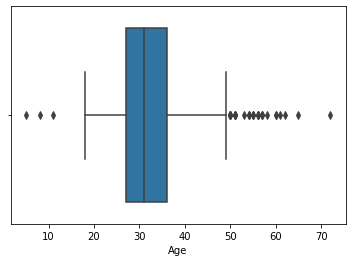

In [13]:
sns.boxplot(df['Age'])

In [14]:
df['Country'].value_counts()

United States             748
United Kingdom            184
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Sweden                      7
Italy                       7
Poland                      7
Switzerland                 7
Brazil                      6
Belgium                     6
South Africa                6
Israel                      5
Bulgaria                    4
Singapore                   4
Finland                     3
Mexico                      3
Austria                     3
Russia                      3
Croatia                     2
Greece                      2
Colombia                    2
Portugal                    2
Denmark                     2
Thailand                    1
Czech Republic              1
Romania                     1
Bosnia and Herzegovina      1
Moldova   

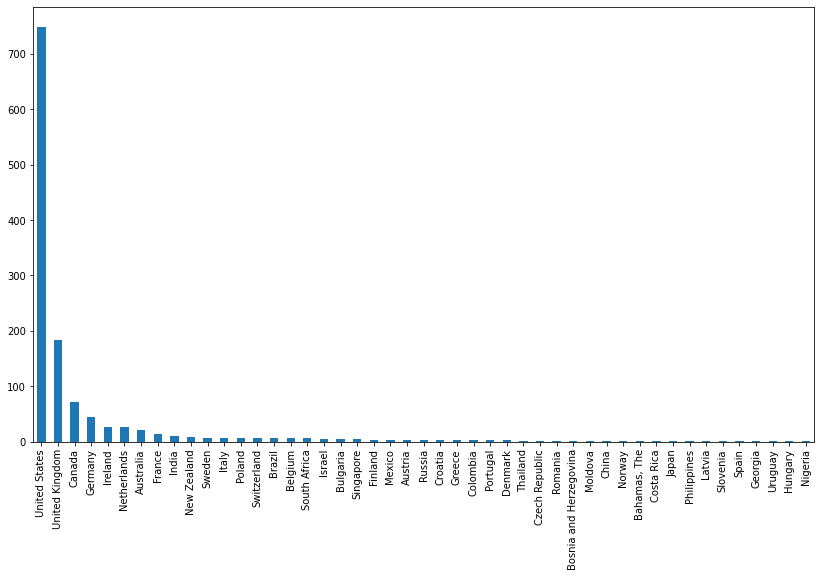

In [15]:
df['Country'].value_counts().plot(kind='bar',figsize=(14,8));

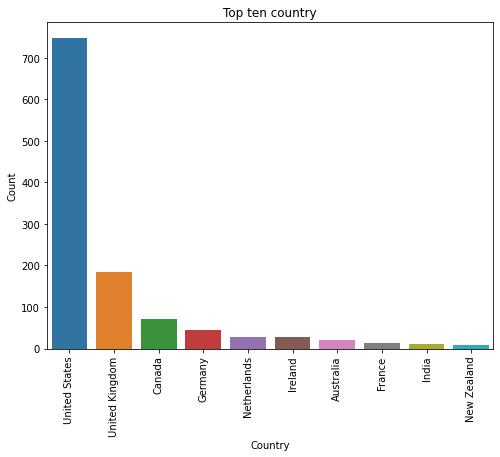

In [16]:
from collections import Counter

top_ten_country = Counter(df['Country'].tolist()).most_common(10)
country_idx = [country[0] for country in top_ten_country]
country_val = [country[1] for country in top_ten_country]
fig,ax = plt.subplots(figsize=(8, 6))
sns.barplot(x = country_idx, y = country_val, ax = ax)
plt.title('Top ten country')
plt.xlabel('Country')
plt.ylabel('Count')
ticks = plt.setp(ax.get_xticklabels(), rotation=90)

In [17]:
country = df.groupby(df['Country'],sort=False)
country['treatment','remote_work','self_employed'].describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



treatment              ... self_employed          
                           count unique  top  ...        unique  top freq
Country                                       ...                        
United States                748      2  Yes  ...             2   No  693
Canada                        72      2  Yes  ...             2   No   61
United Kingdom               184      2  Yes  ...             2   No  156
Bulgaria                       4      2  Yes  ...             1   No    4
France                        13      2   No  ...             2   No   11
Portugal                       2      1   No  ...             1   No    2
Netherlands                   27      2   No  ...             2   No   20
Switzerland                    7      2   No  ...             2   No    6
Poland                         7      2  Yes  ...             2   No    5
Australia                     21      2  Yes  ...             2   No   19
Germany                       45      2   No  ...             2   No   33
Russia                         3      1   No  ...             1   No    3
Mexico                         3      2   No  ...             2   No    2
Brazil                         6      2   No  ...             2   No    4
Slovenia                       1      1  Yes  ...             1   No    1
Costa Rica                     1      1   No  ...             1   No    1
Austria                        3      1   No  ...             2   No    2
Ireland                       27      2   No  ...             2   No   21
India                         10      2   No  ...             2   No    7
South Africa                   6      2  Yes  ...             2   No    4
Italy                          7      2   No  ...             2   No    6
Sweden                         7      2   No  ...             1   No    7
Colombia                       2      1   No  ...             1   No    2
Latvia                         1      1   No  ...             1   No    1
Romania                        1      1   No  ...             1   No    1
Belgium                        6      2   No  ...             1   No    6
New Zealand                    8      2  Yes  ...             1   No    8
Spain                          1      1   No  ...             1   No    1
Finland                        3      2   No  ...             1   No    3
Uruguay                        1      1   No  ...             1   No    1
Israel                         5      1   No  ...             1   No    5
Bosnia and Herzegovina         1      1   No  ...             1   No    1
Hungary                        1      1   No  ...             1  Yes    1
Singapore                      4      2   No  ...             1   No    4
Japan                          1      1  Yes  ...             1  Yes    1
Nigeria                        1      1   No  ...             1   No    1
Croatia                        2      1  Yes  ...             2  Yes    1
Norway                         1      1   No  ...             1   No    1
Thailand                       1      1   No  ...             1  Yes    1
Denmark                        2      1  Yes  ...             1  Yes    2
Bahamas, The                   1      1  Yes  ...             1  Yes    1
Greece                         2      1   No  ...             1   No    2
Moldova                        1      1  Yes  ...             1   No    1
Georgia                        1      1   No  ...             1   No    1
China                          1      1   No  ...             1  Yes    1
Czech Republic                 1      1   No  ...             1   No    1
Philippines                    1      1   No  ...             1   No    1

[47 rows x 12 columns]

From this table, countries like United states, Australia, United Kingdom and Canada have more than 50% of surveyed people who undergo a treatment for mental problems.

In [18]:
df['mental_health_consequence'].value_counts()

No       489
Maybe    476
Yes      289
Name: mental_health_consequence, dtype: int64

In [19]:
df['treatment'].value_counts()

Yes    633
No     621
Name: treatment, dtype: int64

**Data cleaning/Transformation**

In [20]:
df['Gender'].value_counts()

Male                                              613
male                                              205
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Woman                                               3
Male                                                3
Female                                              2
Female (trans)                                      2
Cis Male                                            2
Man                                                 2
Female (cis)                                        1
Guy (-ish) ^_^                                      1
Trans woman                                         1
femail                      

In [21]:
all_male = ['M', 'Male', 'male', 'm', 'Male-ish', 'maile', 'Cis Male', 
                 'Mal', 'Male (CIS)', 'Make', 'Male ', 'Man', 'msle', 'Mail', 'ostensibly male, unsure what that really means', 
                 'cis male', 'Malr', 'Cis Man','something kinda male?', 'Guy (-ish) ^_^', 'male leaning androgynous']

all_female = ['female', 'Cis Female', 'f', 'F', 'Woman','woman', 'Femake', 'Trans woman', 'Female', 'Female (trans)'
              , 'cis-female/femme', 'Female (cis)', 'femail', 'queer/she/they', 'Trans-female']

other = [ 'non-binary', 'Nah', 'All', 'Enby', 'fluid', 'Genderqueer', 'Androgyne', 'Agender', 'Neuter', 'queer', 
         'A little about you', 'p']



for i in df.index:
    if df.Gender[i] in all_male:
        df.at[i, 'Gender']='M'
    elif df.Gender[i] in all_female:
        df.at[i, 'Gender']='F'
    else:
        df.at[i, 'Gender']='O'

In [22]:
# check value count
x = df.Gender.value_counts().index.tolist()
y = df.Gender.value_counts().tolist()

fig = make_subplots(rows=1, cols=2)

# Initialize figure with subplots
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "bar"}, {"type": "pie"}]])


DEFAULT_PLOTLY_COLORS=['rgb(31, 119, 180)', 'rgb(255, 127, 14)',
                       'rgb(44, 160, 44)', 'rgb(214, 39, 40)',
                       'rgb(148, 103, 189)', 'rgb(140, 86, 75)',
                       'rgb(227, 119, 194)', 'rgb(127, 127, 127)',
                       'rgb(188, 189, 34)', 'rgb(23, 190, 207)']

colors = DEFAULT_PLOTLY_COLORS[:len(x)]

# Add bar graph of Gender Count
fig.add_trace(
    go.Bar(x=x, y=y,
           text=y,
           textposition='auto',
           marker_color=colors,
           showlegend=False), 
    row=1, col=1
)

# Add pie chart of Gender Count
fig.add_trace(
    go.Pie(labels=x, values=y,
           marker_colors=colors
           ),
    row=1, col=2
)

# Update Figure Visuals
fig.update_layout(
    height=600, width=800, 
    template="plotly_dark",
    title_text="Gender Count" # Name of Plot
    )

fig.show()

In [23]:
employ = df.groupby(['self_employed'])
employ['treatment'].describe()

,count,unique,top,freq
self_employed,,,,
No,1110,2,Yes,557
Yes,144,2,Yes,76


***Regardless of whether a person is self_employed or not, it has no affect on the person getting treated for mental trauma.***

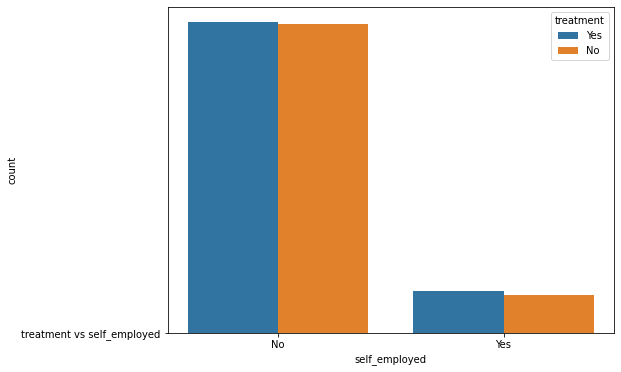

In [24]:
# treatment vs self_employed

fig,ax = plt.subplots(figsize=(8, 6))
sns.countplot(data=df, x = 'self_employed', hue = 'treatment', ax = ax)
plt.plot('treatment vs self_employed')

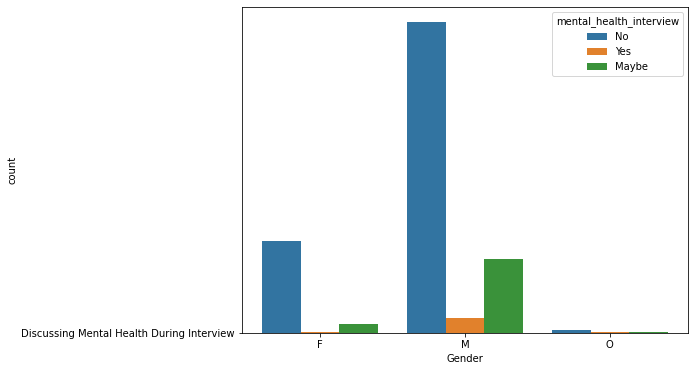

In [25]:
# Gender vs mental_health_interview

fig,ax = plt.subplots(figsize=(8, 6))
sns.countplot(data=df, x = 'Gender', hue = 'mental_health_interview', ax = ax)
plt.plot('Discussing Mental Health During Interview')

**Majority of employees are unwilling to discuss their mental health issues with their prospective employers during interview**.
The reasonable cause of this is that, employees view discussing this issue may be a **disadvantage in getting employed**.

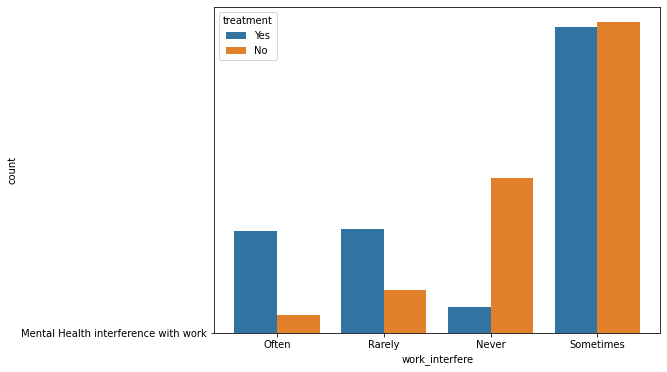

In [26]:
fig,ax = plt.subplots(figsize=(8, 6))
sns.countplot(data=df, x = 'work_interfere', hue='treatment', ax = ax)
plt.plot('Mental Health interference with work')

 People who may or may not undergo treatment both agree that their mental health affect their productivity in work sometimes.

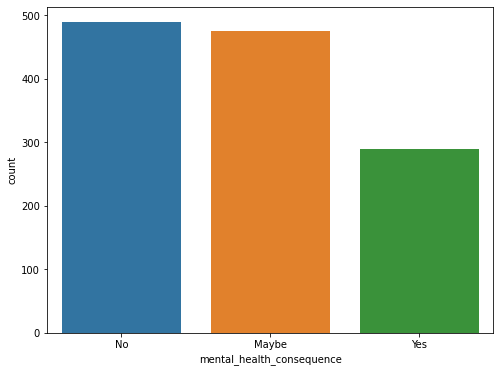

In [27]:
fig,ax = plt.subplots(figsize=(8, 6))
sns.countplot(data=df, x = 'mental_health_consequence', ax = ax)

most Employees suffer no consequences in there workplace regarding theirs mental health and discussing a mental health issue with their employer won't have negative consequences

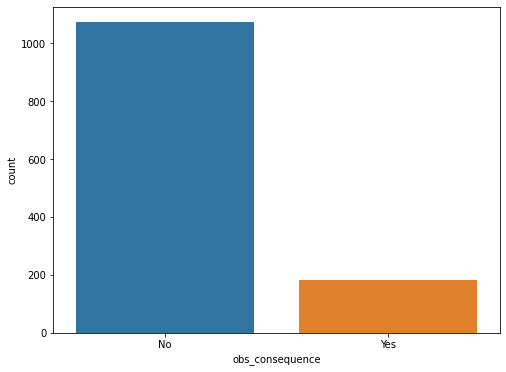

In [28]:
fig,ax = plt.subplots(figsize=(8, 6))
sns.countplot(data=df, x = 'obs_consequence', ax = ax)

**Conclusion**


**1.**   About 60% of surveyed people are residents of the United States.

**2.**   Top surveyed countries like United states, Australia, United Kingdom and   Canada have more than 50% of surveyed people who undergo a treatment for mental problems.

**3.**   About 80% of people who partake in the survey are male.

**4.**   Regardless of whether a person is self_employed or not, it has no affect on the person getting treated for mental trauma.

**5.**   Majority of employees are unwilling to discuss their mental health issues with their prospective employers during interview. The reasonable cause of this is that, employees view discussing this issue may be a disadvantage in getting employed.

**6.**   Employees feel discussing mental health issue with their employer won't have negative consequences.

**7.**   People who may or may not undergo treatment both agree that their mental health affect their productivity in work sometimes.



